In [163]:
import pandas as pd
import numpy as np
import scipy.stats as st
from datetime import datetime
import seaborn as sn

In [47]:
sample = pd.read_csv('G_PSQL_data/JAN_sample_raw.txt')
sample.columns

C:\Users\broug\AppData\Local\Temp\ipykernel_336\920161533.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  sample = pd.read_csv('G_PSQL_data/JAN_sample_raw.txt')


Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [12]:
sample.drop(columns=['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'no_name', 'longest_add_gtime', 'total_add_gtime', 'canellation_code', 'dup', 'diverted', 'cancelled'], inplace=True)

In [26]:
sample['dep_time'] = pd.to_datetime(sample['dep_time'], format='%H%M', errors='coerce')
sample['arr_time'] = pd.to_datetime(sample['arr_time'], format='%H%M', errors='coerce')

In [18]:
nulls = sample.isnull().sum()
(nulls / len(sample) * 100).sort_values(ascending=False)

arr_time               2.006382
arr_delay              1.787115
air_time               1.770180
actual_elapsed_time    1.770180
dep_time               1.605284
taxi_in                1.602610
wheels_on              1.600827
dep_delay              1.578544
taxi_out               1.559826
wheels_off             1.558043
tail_num               0.368119
crs_elapsed_time       0.000891
cancelled              0.000000
dup                    0.000000
crs_arr_time           0.000000
flights                0.000000
diverted               0.000000
fl_date                0.000000
mkt_unique_carrier     0.000000
crs_dep_time           0.000000
dest_city_name         0.000000
dest                   0.000000
dest_airport_id        0.000000
origin_city_name       0.000000
origin                 0.000000
origin_airport_id      0.000000
op_carrier_fl_num      0.000000
op_unique_carrier      0.000000
mkt_carrier_fl_num     0.000000
mkt_carrier            0.000000
branded_code_share     0.000000
distance

In [22]:
from functions import rename_brand_code, remove_outliers
sample = rename_brand_code(sample)

In [24]:
sample = remove_outliers(sample)

In [3]:
sample.drop(columns='Unnamed: 0', inplace=True)

In [178]:
# distance is split into quantiles which correspond to 31-416, 417-867, 868, 4963
from functions import process_distance
df = process_distance(df)

TypeError: an integer is required (got type str)

In [6]:
sample.to_csv('G_PSQL_data/JAN_sample_processing.csv', index=False)

In [14]:
newdf.to_csv('G_PSQL_data/jan_cleaned.csv', index=False)

#### passenger table processing

In [68]:
sample = pd.read_csv('G_PSQL_data/JAN_passengers.txt', parse_dates=True)

In [69]:
flights = pd.read_csv('G_PSQL_data/super_cleaned.csv')
flights

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dest,dist_cats,origin_airport_id,dest_airport_id,arr_delay,crs_elapsed_time,dep_hour,arr_hour,week_day
0,2019-01-01 00:01:00,NK,NK,LAX,OAK,short,12892,13796,-6.0,81.0,19,20,1
1,2019-01-01 00:01:00,AA,OH,DCA,BDL,short,11278,10529,-15.0,75.0,13,13,1
2,2019-01-01 00:01:00,AA,OH,CLT,BTV,medium,11057,10785,-16.0,132.0,18,20,1
3,2019-01-01 00:01:00,AA,OH,CLT,MKE,medium,11057,13342,-20.0,136.0,16,17,1
4,2019-01-01 00:01:00,NK,NK,MCO,SJU,long,13204,14843,17.0,155.0,23,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108432,2018-01-31 00:01:00,DL,G7,MSP,RDU,long,13487,14492,-33.0,161.0,15,18,2
108433,2018-01-31 00:01:00,DL,G7,BNA,RDU,medium,10693,14492,64.0,225.0,20,22,2
108434,2018-01-31 00:01:00,DL,G7,MEM,DTW,medium,13244,11433,-21.0,119.0,6,8,2
108435,2018-01-31 00:01:00,DL,CP,LAS,LAX,short,12889,12892,-7.0,90.0,9,10,2


In [70]:
sample = sample[sample['year'] > 2016]

In [62]:
sample = sample[(sample['dest_country_name'] =='United States') & (sample['origin_country_name'] == 'United States')]

In [66]:
sample.drop(columns=['dest_country', 'dest_country_name', 'origin_country_name', 'origin_country', 'data_source'], inplace=True)

C:\Users\broug\AppData\Local\Temp\ipykernel_336\1267708381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.drop(columns=['dest_country', 'dest_country_name', 'origin_country_name', 'origin_country', 'data_source'], inplace=True)


In [136]:
sample = sample[(sample['dest_country'] == 'US') & (sample['origin_country'] == 'US')]

In [144]:
sample['op_unique_carrier'] = sample['unique_carrier']

C:\Users\broug\AppData\Local\Temp\ipykernel_336\2854837492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['op_unique_carrier'] = sample['unique_carrier']


In [89]:
df.drop(columns=['year', 'month'], inplace=True)

In [91]:
df.to_csv('G_PSQL_data/flights_passengers.csv', index=False)

In [134]:
df['total_passengers'] = df['passengers']

In [148]:
dest_airport = df.groupby(['dest_airport_id'], as_index=False).agg({'passengers': 'sum', 'mail': 'mean', 'freight': 'mean', 'arr_delay': 'mean', 'unique_carrier': 'count'}).sort_values(by='passengers', ascending=False)

In [149]:
origin_airport = df.groupby('origin_airport_id', as_index=False).agg({'passengers': 'sum', 'mail': 'mean', 'freight': 'mean', 'arr_delay': 'mean', 'unique_carrier': 'size'})

In [151]:
origin_airport['cargo'] = origin_airport['mail'] + origin_airport['freight']

In [152]:
origin_airport['cargo/carrier'] = origin_airport['cargo'] / origin_airport['unique_carrier']
origin_airport['passengers/carrier'] = origin_airport['passengers'] / origin_airport['unique_carrier']
origin_airport['cargo/passengers'] = origin_airport['cargo'] / origin_airport['passengers'] 
origin_airport.drop(columns=['mail', 'freight'], inplace=True)
origin_airport

,origin_airport_id,passengers,arr_delay,unique_carrier,cargo,cargo/carrier,passengers/carrier,cargo/passengers
0,10135,495119,11.238754,289,19.166090,0.066319,1713.214533,0.000039
1,10136,421992,11.861111,216,355.333333,1.645062,1953.666667,0.000842
2,10140,10211746,-2.496269,3752,43383.426439,11.562747,2721.680704,0.004248
3,10141,50479,-4.727273,22,0.000000,0.000000,2294.500000,0.000000
4,10146,81284,-6.357143,42,0.000000,0.000000,1935.333333,0.000000
...,...,...,...,...,...,...,...,...
355,15841,26158,-11.666667,36,10507.055556,291.862654,726.611111,0.401677
356,15919,3122420,1.142930,1952,97.253074,0.049822,1599.600410,0.000031
357,15991,8329,-15.393939,33,7836.939394,237.483012,252.393939,0.940922
358,16101,347598,2.925926,54,820.000000,15.185185,6437.000000,0.002359


In [162]:
origin_airport.sort_values(by='arr_delay', ascending=False)

,origin_airport_id,passengers,arr_delay,unique_carrier,cargo,cargo/carrier,passengers/carrier,cargo/passengers
244,13832,1916,92.000000,3,0.000000,0.000000,638.666667,0.000000
254,14006,24814,39.160000,25,0.000000,0.000000,992.560000,0.000000
158,12244,58475,39.043478,46,345.543478,7.511815,1271.195652,0.005909
17,10333,5261,39.000000,20,0.000000,0.000000,263.050000,0.000000
275,14259,8319,35.333333,12,0.000000,0.000000,693.250000,0.000000
...,...,...,...,...,...,...,...,...
314,14802,1389,-17.333333,3,0.000000,0.000000,463.000000,0.000000
274,14256,41207,-18.190476,63,12229.873016,194.124969,654.079365,0.296791
329,15008,8506,-18.666667,6,0.000000,0.000000,1417.666667,0.000000
180,12519,11116,-22.625000,16,0.000000,0.000000,694.750000,0.000000


<AxesSubplot:xlabel='passengers', ylabel='arr_delay'>

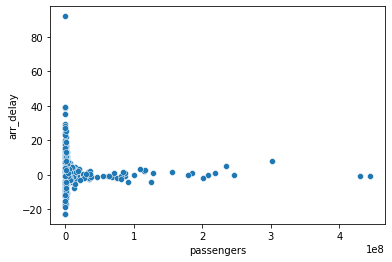

In [172]:
sn.scatterplot(x=origin_airport['passengers'], y=origin_airport['arr_delay'])

In [191]:
df = pd.read_csv('G_PSQL_data/JAN_sample_no_outliers.csv')
df = df[df['crs_elapsed_time'] < 500]

In [192]:
df['dist_cats'] = pd.qcut(df['distance'], 3, labels=['short', 'medium', 'long'])


In [193]:
df['fl_date'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d', errors='coerce')

In [194]:
df.drop(columns='Unnamed: 0', inplace=True)

In [209]:
df.to_csv('final_process.csv', index=False)

#### hourly flights

In [198]:
df = pd.read_csv('final_process.csv')